Email homework to angela.y.wuu@gmail.com

Final project 
- ideas on google doc
- 15-20 min video, have opportunity to refilm 
- 1pg written "cheat sheet"
- job interview-like
- earlier is better! 

Rough rubric: 
Technical Mastery,
Presentation ability,
Demonstrated potential for growth, 
Demonstrated potential as a teammate, 
Demonstrated ability to work solo,


__Hierarchical clustering__ groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level. This allows you to decide the level or scale of clustering that is most appropriate for your application.

__K-means clustering__ is a partitioning method. The data is partitioned into k mutually exclusive clusters and returns the index of the cluster to which it has assigned each observation. Unlike hierarchical clustering, k-means clustering operates on actual observations (rather than the larger set of dissimilarity measures) and creates a single level of clusters. The distinctions mean that k-means clustering is often more suitable than hierarchical clustering for large amounts of data. k-means treats each observation in your data as an object having a location in space. It finds a partition in which objects within each cluster are as close to each other as possible and as far from objects in other clusters as possible

__Gaussian mixture models__ assign each observation to a cluster by maximizing the posterior probability that the data point belongs to its assigned cluster.

In machine learning, __lazy learning__ is a learning method in which generalization beyond the training data is delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries.

The main advantage gained in employing a lazy learning method, such as case-based reasoning, is that the target function will be approximated locally, __such as in the k-nearest neighbor__ algorithm. Because the target function is approximated locally for each query to the system, lazy learning systems can simultaneously solve multiple problems and deal successfully with changes in the problem domain.

The disadvantages with lazy learning include the large space requirement to store the entire training dataset. Particularly noisy training data increases the case base unnecessarily, because no abstraction is made during the training phase. Another disadvantage is that lazy learning methods are usually slower to evaluate, though this is coupled with a faster training phase.

__Lazy classifiers are most useful for large datasets with few attributes__.

__Fuzzy c-means (FCM)__ is a data-clustering technique wherein each data point belongs to a cluster to some degree that is specified by a membership grade. FCM allows one piece of data to belong to two or more clusters.

__Self Organizing Maps__ Dimensional reduction when we have non-normal distributions. At each stage of representation, or processing, each piece of incoming information is kept in its proper context/neighborhood.

Topology is a mathematical discipline that studies shape. __Topological data analysis (TDA)__ refers to the adaptation of this discipline to analyzing highly complex data. It draws on the philosophy that all data have an underlying shape and that shape has meaning.

The analysis creates a summary or compressed representation of all of the data points to help rapidly uncover critical patterns and relationships in data. By identifying the geometric relationships that exist between data points, TDA offers an extremely simple way of interrogating data to understand the underlying properties that characterize the segments and subsegments that lie within data.

From Wikipedia, the free encyclopedia  

In machine learning, __hyperparameter__ optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.[1] The objective function takes a tuple of hyperparameters and returns the associated loss.[1] Cross-validation is often used to estimate this generalization performance.[2]

__Import Packages__

In [1]:
import numpy as np
from itertools import product
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

__Create Data__

In [2]:
# x = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
# y = np.random.choice([0,1], size=(x.shape[0],), p=[1./3, 2./3])
iris = datasets.load_iris()
x = iris.data
y = iris.target
n_folds = 5
dataInputVariable = (x,y,n_folds)

1. Write a function to take a list or dictionary of clfs and hypers ie use logistic regression, each with 3 different sets of hyper parameters for each.
2. Expand to include larger number of classifiers and hyperparmeter settings.
3. Find some simple data.
4. Generate matplotlib plots that will assist in identifying the optimal clf and parameters settings.

__EXAMPLES__ https://stackoverflow.com/questions/41901344/iterating-through-functions-and-outputting-results-in-organized-pandas-dataframe

__Also be sure to look at__ https://scikit-learn.org/stable/modules/grid_search.html

__Create a list of classifier algorithms and a dictionary of thier parameters__

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


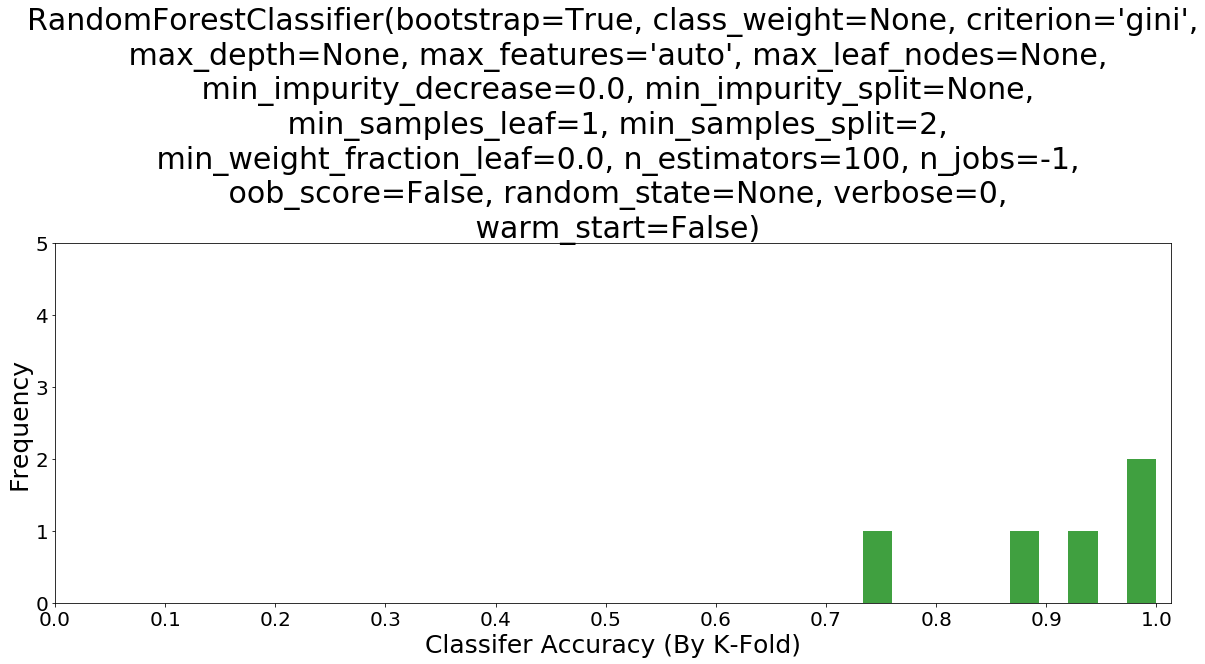

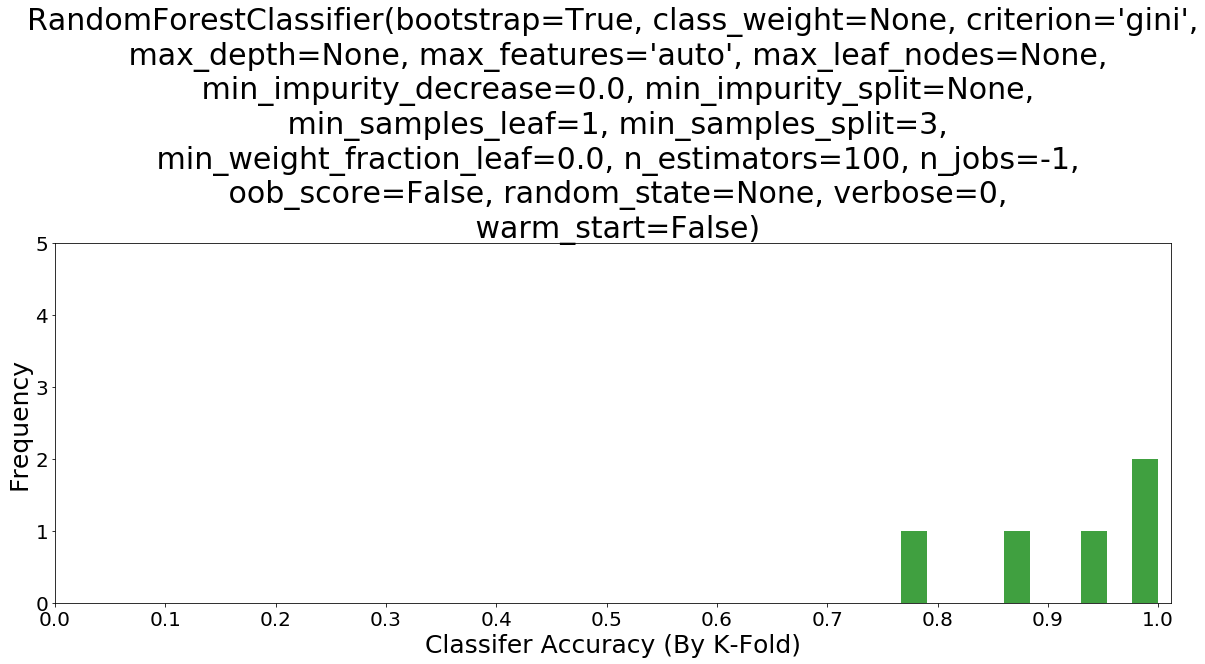

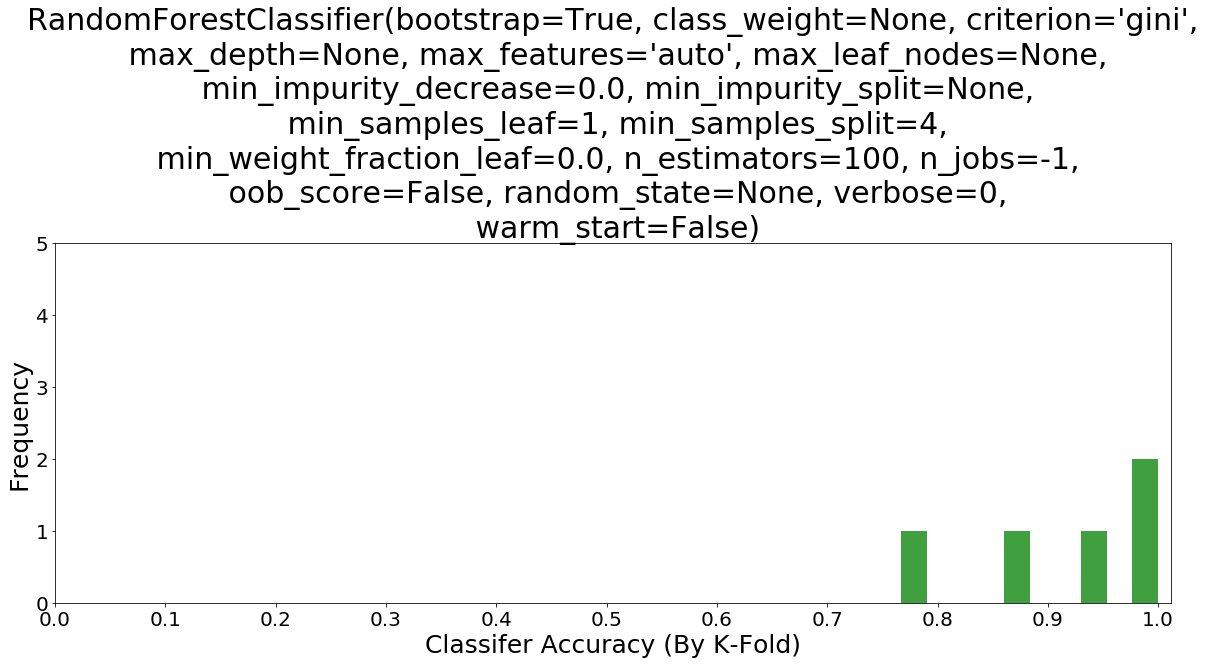

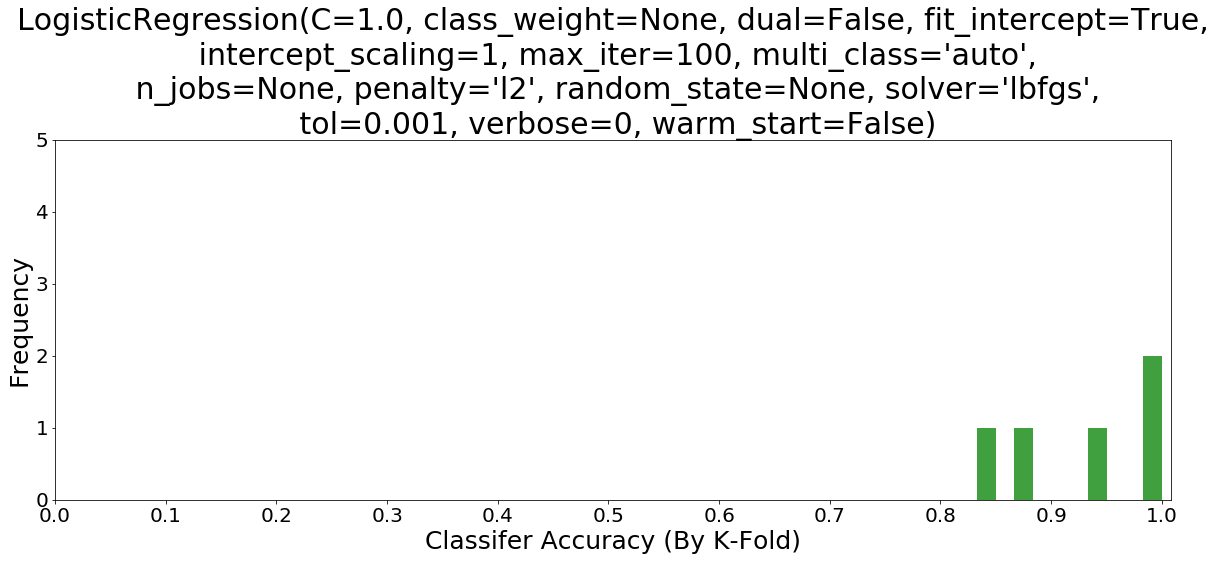

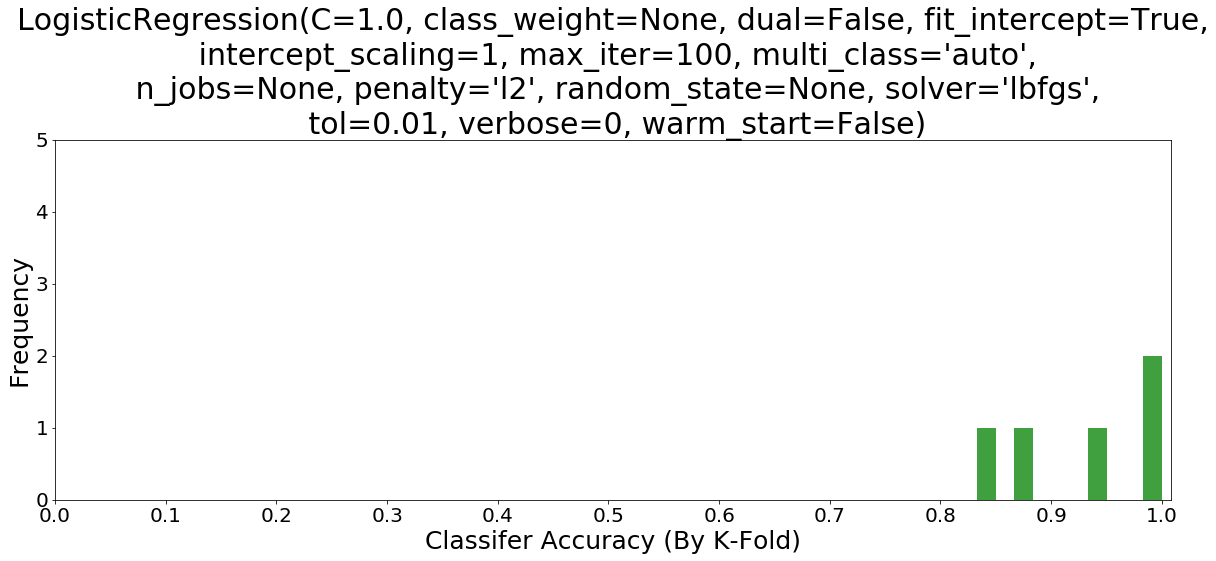

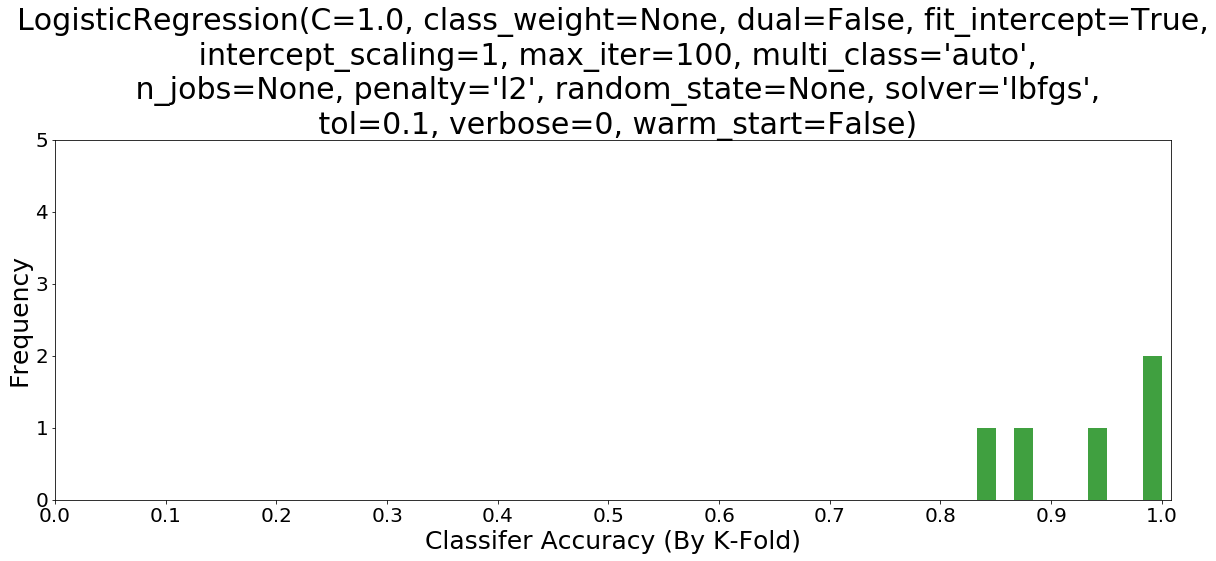

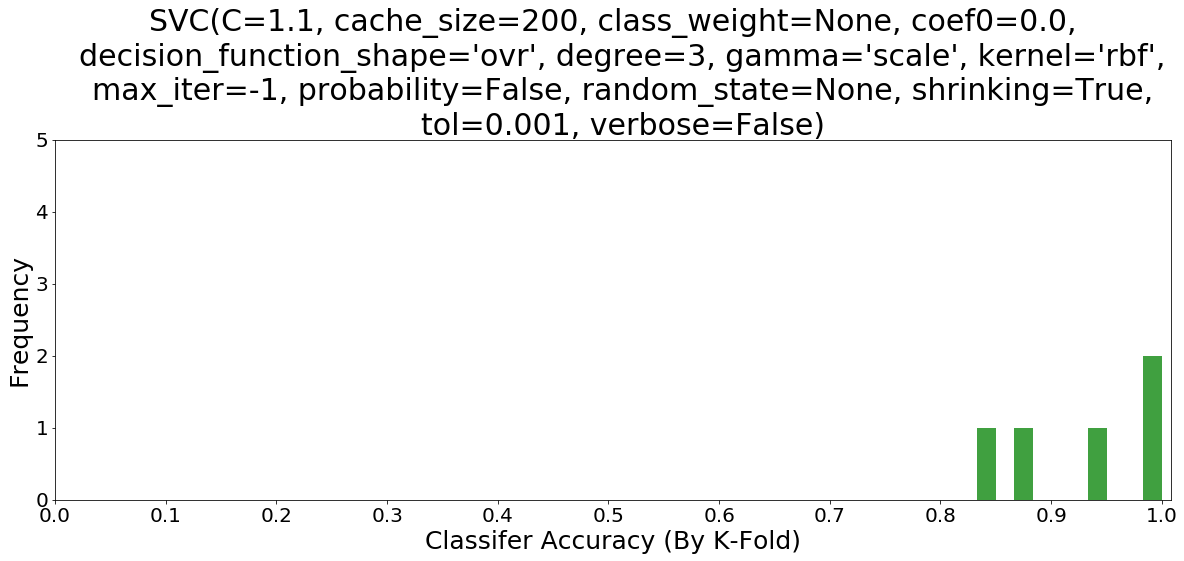

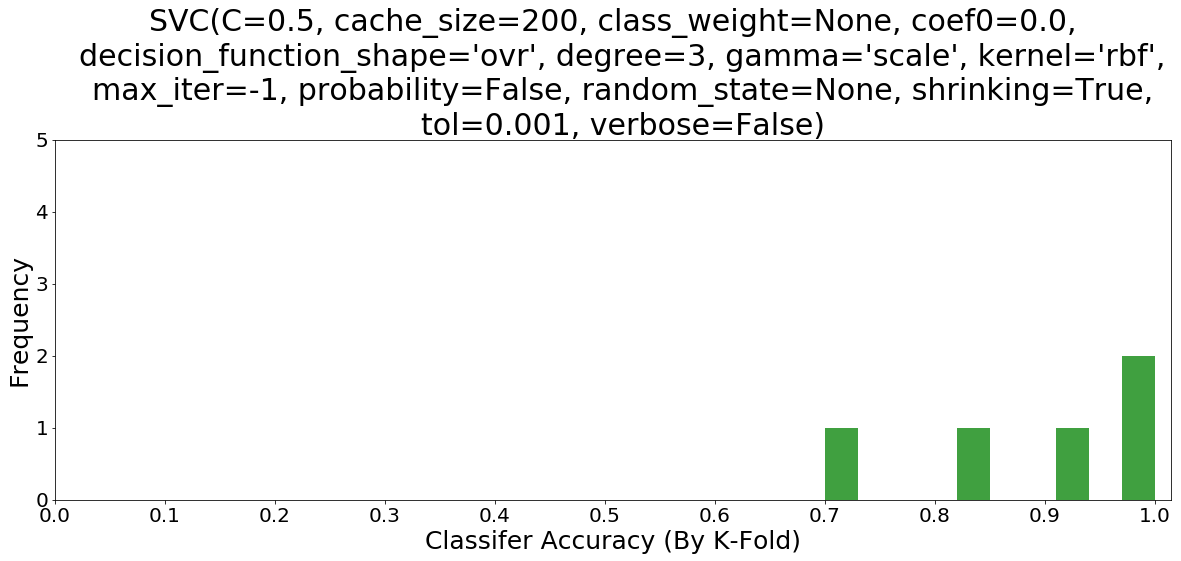

In [3]:
# copied and adapted from Christopher Havenstein office hours presentations
#accuracy, precision, recall, f1 score







classifiersList = [RandomForestClassifier, LogisticRegression,SVC]
classifierParametersDictionary = {'RandomForestClassifier': {"min_samples_split": [2,3,4],"n_estimators":[100],"n_jobs":[-1]},
                                  'LogisticRegression': {"tol": [0.001,0.01,0.1],"solver":['lbfgs'],"multi_class":['auto']},
                                 'SVC': {"C": [1.1, 0.5],"gamma":['scale']}}

def run(classifierInputVariable, dataInputVariable, parameterInputVariable={}):
    x, y, n_folds = dataInputVariable
    kf = KFold(n_splits=n_folds)
    ret = {}
    for a, (train_index, test_index) in enumerate(kf.split(x, y)):
        aClassifier = classifierInputVariable(**parameterInputVariable)
        aClassifier.fit(x[train_index], y[train_index])
        pred = aClassifier.predict(x[test_index])
        ret[a]= {'Classifier Function Used': aClassifier,
                 'train_index': train_index,
                 'test_index': test_index,
                 'accuracy': accuracy_score(y[test_index], pred)}
    return ret

# results={}
clfsAccuracyDict = {}

for classifier in classifiersList:
    classifierString = str(classifier)
    for outerKey, outerValue in classifierParametersDictionary.items():
        if outerKey in classifierString:
            innerKey,innerValue = zip(*outerValue.items())
            for values in product(*innerValue):
                parameterInputVariable = dict(zip(innerKey, values))
                results = run(classifier, dataInputVariable, parameterInputVariable)
                for key in results:
                    k1 = results[key]['Classifier Function Used']
                    v1 = results[key]['accuracy']
                    k1Test = str(k1)
                    k1Test = k1Test.replace('            ',' ')
                    k1Test = k1Test.replace('          ',' ')
                    if k1Test in clfsAccuracyDict:
                        clfsAccuracyDict[k1Test].append(v1)
                    else:
                        clfsAccuracyDict[k1Test] = [v1] #create a new key (k1Test) in clfsAccuracyDict with a new value, (v1)
#                         print(clfsAccuracyDict)   
                        
n = max(len(v1) for k1, v1 in clfsAccuracyDict.items())

# for naming the plots
filename_prefix = 'clf_Histograms_'

# initialize the plot_num counter for incrementing in the loop below
plot_num = 1 

# Adjust matplotlib subplots for easy terminal window viewing
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.6      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height

#create the histograms
for k1, v1 in clfsAccuracyDict.items():
    # for each key in our clfsAccuracyDict, create a new histogram with a given key's values 
    fig = plt.figure(figsize =(20,10)) # This dictates the size of our histograms
    ax  = fig.add_subplot(1, 1, 1) # As the ax subplot numbers increase here, the plot gets smaller
    plt.hist(v1, facecolor='green', alpha=0.75) # create the histogram with the values
    ax.set_title(k1, fontsize=30) # increase title fontsize for readability
    ax.set_xlabel('Classifer Accuracy (By K-Fold)', fontsize=25) # increase x-axis label fontsize for readability
    ax.set_ylabel('Frequency', fontsize=25) # increase y-axis label fontsize for readability
    ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1)) # The accuracy can only be from 0 to 1 (e.g. 0 or 100%)
    ax.yaxis.set_ticks(np.arange(0, n+1, 1)) # n represents the number of k-folds
    ax.xaxis.set_tick_params(labelsize=20) # increase x-axis tick fontsize for readability
    ax.yaxis.set_tick_params(labelsize=20) # increase y-axis tick fontsize for readability
    #ax.grid(True) # you can turn this on for a grid, but I think it looks messy here.

    # pass in subplot adjustments from above.
    
    plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
    plot_num_str = str(plot_num) #convert plot number to string
#     filename = filename_prefix + plot_num_str # concatenate the filename prefix and the plot_num_str
#     plt.savefig(filename, bbox_inches = 'tight') # save the plot to the user's working directory
    plot_num = plot_num+1 # increment the plot_num counter by 1
    
plt.show()